# Train Passenger Volume Prediction

<img src="https://wallpaperplay.com/walls/full/6/2/0/159951.jpg" height='400px' width='100%'><br/>





## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Filling missing values](#section401)<br>
  - 4.2 [Transforming date columns](#section402)<br>
  - 4.3 [Removing highly Correlated Columns](#section403)<br>
  - 4.4 [Pandas Profiling after Data Preprocessing](#section404)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Univariate Analysis](#section501)<br>
  - 5.2 [Multivariate Analysis](#section502)<br>
6. [Data preparation for model building](#section5)<br>
  - 6.1 [Standardising continuous columns](#section601)<br>
  - 6.2 [Dummification / One-Hot Encoding of categorical variables](#section602)<br>
 
7. [Creating model and prediction](#section7)<br>  
  - 7.1 [Logistic Regression](#section701)
  - 7.2 [KNN](#section702) 
  - 7.3 [Naive Bayes](#section703)
  - 7.4 [SVM](#section704)     
8.  [Conclusion](#section8)<br>
    

italicised text<a id=section1></a>
# 1. Problem Statement

In this challenge, our task is to predict the volume of passengers in trains.

<a id=section2></a>
# 2. Importing packages

In [ ]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.get_option("display.max_rows",10000)
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')     

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from numpy import median
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.lines as mlines

<a id=section3></a>
# 3. Loading Data


In [ ]:
df_train = pd.read_csv('Train.csv', index_col = "id_code")

df_test = pd.read_csv('Test.csv', index_col = "id_code")

df_train.shape, df_test.shape

((1284, 18), (964, 17))

In [ ]:
df_train.sample(10)

,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
id_code,,,,,,,,,,,,,,,,,,
aimxhkkndepvgru,2016-07-30,10:44:26 AM,station$544,station$147,ICVAR,low,whber,3.710675,51.035896,309.014451,whber,4.356801,50.845658,634.164740,2016,30,Saturday,True
gvztafnkbaloerl,2016-09-26,08:42:47 AM,station$106,station$108,SSXRVS,medium,whber,4.373674,50.838943,142.601156,whber,4.389513,50.822187,102.765896,2016,39,Monday,False
sgvbhnwlccxptlk,2016-09-19,07:15:22 AM,station$524,station$523,PSVSR,high,whber,3.793627,50.661235,27.141618,whber,3.823408,50.686585,27.141618,2016,38,Monday,False
dbtdeiysdjscume,2016-09-22,10:48:07 PM,station$356,station$359,LUYTR,low,whber,4.668538,50.590823,31.508671,whber,4.613884,50.637611,31.508671,2016,38,Thursday,False
njwzzybbwzjgcjn,2016-08-11,11:25:33 AM,station$178,station$185,ICYAXX,low,whber,4.421101,51.217200,467.982659,whber,4.432221,51.199230,421.644509,2016,32,Thursday,False
ghscvcthhghvwee,2016-10-04,07:58:47 PM,station$130,station$247,ICYYZS,low,whber,4.360846,50.859663,640.265896,whber,5.050031,50.993341,84.919075,2016,40,Tuesday,False
mllcpjjhlxpagkg,2016-09-29,07:26:50 AM,station$500,station$496,PTSUW,medium,whber,3.744708,50.423335,24.670520,whber,3.820253,50.442860,71.514451,2016,39,Thursday,False
jwiljeqxvgoihzd,2016-08-04,04:20:24 PM,station$281,station$266,ICVXS,low,whber,5.566695,50.624550,269.124277,whber,4.715866,50.882280,351.916185,2016,31,Thursday,False
qafhcjfsgoojgob,2016-09-16,10:42:26 AM,station$571,station$544,ZSYS,low,whber,3.740591,51.056365,80.534682,whber,3.710675,51.035896,309.014451,2016,37,Friday,False


<a id=section301></a>
## 3.1 Description of the Datasets

### a. shape

In [ ]:
# checking shape of data
df_train.shape, df_test.shape

((1284, 18), (964, 17))

### b. info

#### Train

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, isfywypmkqqhyft to hfhwirltuffenfr
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   current_date                 1284 non-null   object 
 1   current_time                 1284 non-null   object 
 2   source_name                  1284 non-null   object 
 3   destination_name             1284 non-null   object 
 4   train_name                   1284 non-null   object 
 5   target                       1284 non-null   object 
 6   country_code_source          1283 non-null   object 
 7   longitude_source             1283 non-null   float64
 8   latitude_source              1283 non-null   float64
 9   mean_halt_times_source       1283 non-null   float64
 10  country_code_destination     1251 non-null   object 
 11  longitude_destination        1251 non-null   float64
 12  latitude_destination         1251 non-null   float64
 13

#### Test

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, mckbezdplrukagl to xwqxedeqlnimclu
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   current_date                 964 non-null    object 
 1   current_time                 964 non-null    object 
 2   source_name                  964 non-null    object 
 3   destination_name             964 non-null    object 
 4   train_name                   964 non-null    object 
 5   country_code_source          964 non-null    object 
 6   longitude_source             964 non-null    float64
 7   latitude_source              964 non-null    float64
 8   mean_halt_times_source       964 non-null    float64
 9   country_code_destination     964 non-null    object 
 10  longitude_destination        964 non-null    float64
 11  latitude_destination         964 non-null    float64
 12  mean_halt_times_destination  964 non-null    float64
 13 

### c. describe

#### Train

In [ ]:
df_train.describe()

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week
count,1283.000000,1283.000000,1283.000000,1251.000000,1251.000000,1251.000000,1284.0,1284.000000
mean,4.292481,50.934674,278.061613,4.298829,50.924570,271.872701,2016.0,36.781153
std,0.552492,0.206194,228.954089,0.558849,0.296266,234.419223,0.0,3.175253
min,-0.126061,49.638463,0.000000,0.321070,43.455128,0.000000,2016.0,30.000000
25%,4.039653,50.845658,78.488439,4.014573,50.835707,71.193642,2016.0,36.000000
50%,4.360846,50.896456,180.598266,4.356801,50.891925,164.419075,2016.0,38.000000
75%,4.482785,51.056365,467.982659,4.482785,51.035896,421.644509,2016.0,39.000000
max,5.982265,51.925093,686.615607,6.958823,52.379128,686.615607,2016.0,40.000000


#### Test

In [ ]:
df_test.describe()

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.0,964.000000
mean,4.281109,50.889685,271.768393,4.277023,50.889969,287.419240,2016.0,41.509336
std,0.578196,0.202678,222.607397,0.572235,0.240117,238.876318,0.0,0.987416
min,2.652770,49.599996,11.973988,2.355309,48.880998,10.283237,2016.0,40.000000
25%,3.841955,50.824506,72.329480,3.942542,50.835707,72.329480,2016.0,41.000000
50%,4.356801,50.882280,202.187861,4.356801,50.859663,180.598266,2016.0,41.000000
75%,4.499323,51.035896,351.916185,4.482785,51.017648,467.982659,2016.0,42.000000
max,6.133331,51.925093,686.615607,6.133331,52.379128,686.615607,2016.0,43.000000


**Observations:**

We observe there are no significant outliers. Let's confirm the same after pandas-profiling

 <a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [ ]:
# To install pandas profiling please run this command.

#!pip install pandas-profiling --upgrade

In [ ]:
from pandas_profiling import ProfileReport

# Running pandas profiling to get better understanding of data
#profile =  ProfileReport(df_train, title='Pandas Profiling Report before data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="train_report_before_processing.html")

In [ ]:
# Running pandas profiling to get better understanding of data
#profile =  ProfileReport(df_test, title='Pandas Profiling Report before data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="test_report_before_processing.html")

# 4. Data Processing

 <a id=section401></a>
##  4.1 Removing columns with constant values

In [ ]:
df_train['current_year'].value_counts()

2016    1284
Name: current_year, dtype: int64

In [ ]:
df_train.drop('current_year', axis=1, inplace=True)
df_test.drop('current_year', axis=1, inplace=True)

In [ ]:
df_train['country_code_source'].value_counts()

whber    1280
qwnll    1   
wsluu    1   
logbp    1   
Name: country_code_source, dtype: int64

In [ ]:
df_train.drop('country_code_source', axis=1, inplace=True)
df_test.drop('country_code_source', axis=1, inplace=True)

In [ ]:
df_train['country_code_destination'].value_counts()

whber    1247
zxdec    1   
qwnll    1   
logbp    1   
aqfre    1   
Name: country_code_destination, dtype: int64

In [ ]:
df_train.drop('country_code_destination', axis=1, inplace=True)
df_test.drop('country_code_destination', axis=1, inplace=True)

 <a id=section402></a>
##  4.2 Converting current_date and current_time to pandas datatime

#### Train

In [ ]:
# concatenating current_date and current_time to form datetime string
df_train['current_date_time'] = df_train['current_date'].astype('str')  + " " + df_train['current_time'].astype('str')

# converting datetime string to pandas datetime
df_train['current_date_time'] = pd.to_datetime( df_train['current_date_time'])

df_train['hour_of_day'] = df_train['current_date_time'].dt.hour
df_train['current_day'] = df_train['current_date_time'].dt.day
df_train['current_month'] = df_train['current_date_time'].dt.month

df_train['hour_of_day'] = df_train['hour_of_day'].astype(str)
df_train['current_day'] = df_train['current_day'] .astype(str)
df_train['current_month'] = df_train['current_month'].astype(str)
df_train['current_week'] = df_train['current_week'].astype(str)

# dropping current_date and current_time columns
df_train.drop(['current_date','current_time', 'current_date_time'], axis = 1, inplace=True)

df_train.head()

,source_name,destination_name,train_name,target,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,hour_of_day,current_month
id_code,,,,,,,,,,,,,,,
isfywypmkqqhyft,station$147,station$1,ICZVZS,high,4.356801,50.845658,634.16474,NaN,NaN,NaN,30,27,False,20,7
mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,high,4.356801,50.845658,634.16474,NaN,NaN,NaN,30,27,False,20,7
alspwwtbdvqsgby,station$147,station$1,ICZVZS,high,4.356801,50.845658,634.16474,NaN,NaN,NaN,30,27,False,20,7
szitxhhqduyrqpg,station$147,station$1,ICZVZS,high,4.356801,50.845658,634.16474,NaN,NaN,NaN,30,27,False,20,7
krisdqzczivvwcp,station$147,station$1,ICZVZS,high,4.356801,50.845658,634.16474,NaN,NaN,NaN,30,27,False,20,7


#### Test

In [ ]:
# concatenating current_date and current_time to form datetime string
df_test['current_date_time'] = df_test['current_date'].astype('str')  + " " + df_test['current_time'].astype('str')

# converting datetime string to pandas datetime
df_test['current_date_time'] = pd.to_datetime( df_test['current_date_time'])

df_test['hour_of_day'] = df_test['current_date_time'].dt.hour
df_test['current_day'] = df_test['current_date_time'].dt.day
df_test['current_month'] = df_test['current_date_time'].dt.month

df_test['hour_of_day'] = df_test['hour_of_day'].astype(str)
df_test['current_day'] = df_test['current_day'] .astype(str)
df_test['current_month'] = df_test['current_month'].astype(str)
df_test['current_week'] = df_test['current_week'].astype(str)

# dropping current_date and current_time columns
df_test.drop(['current_date','current_time', 'current_date_time'], axis = 1, inplace=True)

df_test.head()

,source_name,destination_name,train_name,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,hour_of_day,current_month
id_code,,,,,,,,,,,,,,
mckbezdplrukagl,station$143,station$142,SZAYASZ,4.243393,50.866728,39.121387,4.273543,50.868337,39.121387,40,6,False,1,10
agxwrnbmzbyxsjg,station$133,station$147,ICXYXY,4.326220,50.880833,95.676301,4.356801,50.845658,634.164740,40,6,False,1,10
iqjojyewdyfshtj,station$632,station$544,ICWAT,3.264549,50.824506,153.115607,3.710675,51.035896,309.014451,40,6,False,6,10
hssqexnzirioaag,station$296,station$281,ICWYR,5.599695,50.613152,87.130058,5.566695,50.624550,269.124277,40,6,False,7,10
lublknpfraiznhr,station$281,station$266,ICWYR,5.566695,50.624550,269.124277,4.715866,50.882280,351.916185,40,6,False,7,10


 <a id=section403></a>
## 4.3 Handling missing values in each column


In [ ]:
feature_cols = list(df_test.columns)
continuous_columns = list(df_test.select_dtypes(include='number').columns)
categorical_columns = list(df_test.columns.difference(continuous_columns))

#### Train

In [ ]:
df_train.isna().sum()

source_name                    0 
destination_name               0 
train_name                     0 
target                         0 
longitude_source               1 
latitude_source                1 
mean_halt_times_source         1 
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_week                   0 
current_day                    0 
is_weekend                     0 
hour_of_day                    0 
current_month                  0 
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

# Define the imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Transform the dataset
transformed_values = knn_imputer.fit_transform(df_train[continuous_columns])

In [ ]:
df_train_continuous = pd.DataFrame(transformed_values)
df_train_continuous.columns = continuous_columns
df_train_continuous.index = df_train.index

In [ ]:
df_train_continuous.isna().sum()

longitude_source               0
latitude_source                0
mean_halt_times_source         0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Transform the dataset
transformed_values = simple_imputer.fit_transform(df_train[categorical_columns])

In [ ]:
df_train_categorical = pd.DataFrame(transformed_values)
df_train_categorical.columns = categorical_columns
df_train_categorical.index = df_train.index

In [ ]:
df_train_categorical.isna().sum()

current_day         0
current_month       0
current_week        0
destination_name    0
hour_of_day         0
is_weekend          0
source_name         0
train_name          0
dtype: int64

In [ ]:
# merge categorical and continuos columns
df_train = pd.concat([df_train_continuous,df_train_categorical, df_train['target']], axis = 1).reindex(df_train.index)
df_train.head()

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_day,current_month,current_week,destination_name,hour_of_day,is_weekend,source_name,train_name,target
id_code,,,,,,,,,,,,,,,
isfywypmkqqhyft,4.356801,50.845658,634.16474,4.684309,50.960916,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high
mqsfxyvuqpbwomk,4.356801,50.845658,634.16474,4.684309,50.960916,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high
alspwwtbdvqsgby,4.356801,50.845658,634.16474,4.684309,50.960916,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high
szitxhhqduyrqpg,4.356801,50.845658,634.16474,4.684309,50.960916,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high
krisdqzczivvwcp,4.356801,50.845658,634.16474,4.684309,50.960916,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high


In [ ]:
df_train.isna().sum()

longitude_source               0
latitude_source                0
mean_halt_times_source         0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_day                    0
current_month                  0
current_week                   0
destination_name               0
hour_of_day                    0
is_weekend                     0
source_name                    0
train_name                     0
target                         0
dtype: int64

#### Test

In [ ]:
df_test.isna().sum()

source_name                    0
destination_name               0
train_name                     0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_week                   0
current_day                    0
is_weekend                     0
hour_of_day                    0
current_month                  0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Transform the dataset
transformed_values = simple_imputer.fit_transform(df_test[categorical_columns])

In [ ]:
df_test_categorical = pd.DataFrame(transformed_values)
df_test_categorical.columns = categorical_columns
df_test_categorical.index = df_test.index

In [ ]:
df_test_categorical.isna().sum()

current_day         0
current_month       0
current_week        0
destination_name    0
hour_of_day         0
is_weekend          0
source_name         0
train_name          0
dtype: int64

In [ ]:
# merge categorical and continuos columns
df_test = pd.concat([df_test[continuous_columns],df_test_categorical], axis = 1).reindex(df_test.index)
df_test.head()

,longitude_source,latitude_source,mean_halt_times_source,longitude_destination,latitude_destination,mean_halt_times_destination,current_day,current_month,current_week,destination_name,hour_of_day,is_weekend,source_name,train_name
id_code,,,,,,,,,,,,,,
mckbezdplrukagl,4.243393,50.866728,39.121387,4.273543,50.868337,39.121387,6,10,40,station$142,1,False,station$143,SZAYASZ
agxwrnbmzbyxsjg,4.326220,50.880833,95.676301,4.356801,50.845658,634.164740,6,10,40,station$147,1,False,station$133,ICXYXY
iqjojyewdyfshtj,3.264549,50.824506,153.115607,3.710675,51.035896,309.014451,6,10,40,station$544,6,False,station$632,ICWAT
hssqexnzirioaag,5.599695,50.613152,87.130058,5.566695,50.624550,269.124277,6,10,40,station$281,7,False,station$296,ICWYR
lublknpfraiznhr,5.566695,50.624550,269.124277,4.715866,50.882280,351.916185,6,10,40,station$266,7,False,station$281,ICWYR


In [ ]:
df_test.isna().sum()

longitude_source               0
latitude_source                0
mean_halt_times_source         0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_day                    0
current_month                  0
current_week                   0
destination_name               0
hour_of_day                    0
is_weekend                     0
source_name                    0
train_name                     0
dtype: int64

 <a id=section404></a>
## 4.4 Calculating distance between routes from latitude and longitude

In [ ]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
  # convert decimal degrees to radians 
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
  # haversine formula 
  dlon = lon2 - lon1 
  dlat = lat2 - lat1 
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * asin(sqrt(a)) 
  r = 6371 # Radius of earth in kilometers. Use 3956 for miles
  return c * r

#### Train

In [ ]:
df_train['dist_bw_routes'] = df_train.apply(lambda x: haversine(x['longitude_source'], x['latitude_source'], x['longitude_destination'], x['latitude_destination']), axis=1)
df_train.drop(['longitude_source', 'latitude_source', 'longitude_destination', 'latitude_destination'], axis = 1, inplace = True)
df_train.shape

(1284, 12)

#### Test

In [ ]:
df_test['dist_bw_routes'] = df_test.apply(lambda x: haversine(x['longitude_source'], x['latitude_source'], x['longitude_destination'], x['latitude_destination']), axis=1)
df_test.drop(['longitude_source', 'latitude_source', 'longitude_destination', 'latitude_destination'], axis = 1, inplace = True)
df_test.shape

(964, 11)

 <a id=section405></a>
## 4.5 Handling Outliers



In [ ]:
# storing columns with continuos datatype in 'continuos_cols' 
continuous_columns = df_test.select_dtypes(include='number').columns
categorical_columns = df_test.columns.difference(continuous_columns)

In [ ]:
df_train.shape

(1284, 12)

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
preds = clf.fit_predict(df_train[continuous_columns])

# Select all rows that are not outliers
mask = preds != -1
df_train = df_train[mask]
df_train.shape

(661, 12)

 <a id=section406></a>
## 4.6  Pandas Profiling after Data Preprocessing

In [ ]:
# Running pandas profiling to get better understanding of data
#profile =  ProfileReport(df_train, title='Pandas Profiling Report after data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="train_report_after_processing.html")

In [ ]:
# Running pandas profiling to get better understanding of data
#profile =  ProfileReport(df_test, title='Pandas Profiling Report after data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="test_report_after_processing.html")

**Observations:**

Data looks fine as of now. Lets do EDA and understand more about it.

 <a id=section5></a>
# 5. Exploratory Data Analysis


 <a id=section501></a>
## 5.1  Univariate Analysis

### 5.1.1 Passenger travel count (week-wise)

In [ ]:
df_train['current_week'].value_counts()

39    198
38    158
37    64 
40    58 
30    52 
32    49 
31    37 
33    17 
36    17 
34    7  
35    4  
Name: current_week, dtype: int64

Text(0, 0.5, 'Count')

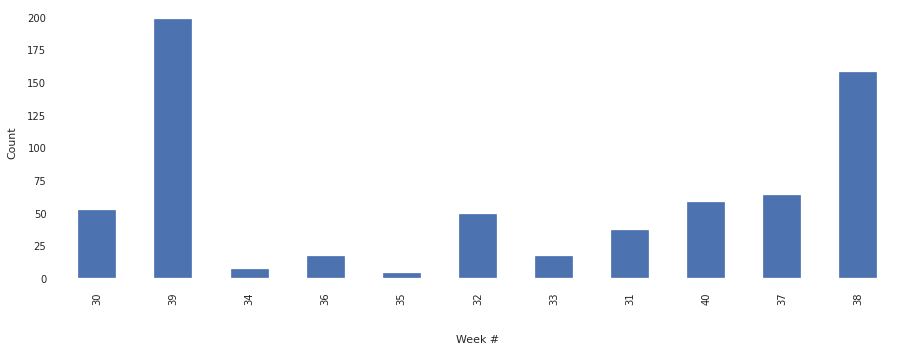

In [ ]:
plt.figure(figsize=(15,5))
df_train['current_week'].value_counts(sort=False).plot(kind='bar')
plt.xlabel("Week #", labelpad = 30)
plt.ylabel("Count", labelpad = 10)

**Observations :**

Most of bookings happenned between week-38 to 43

### 5.1.2 Passenger travel count (day-wise)

In [ ]:
df_train['current_day'].value_counts()

27    61
29    56
26    46
4     43
23    38
30    35
2     33
16    31
19    29
28    28
22    26
21    24
3     23
20    22
18    20
17    19
5     19
8     18
24    17
12    13
11    12
10    11
1     8 
25    8 
9     7 
31    4 
13    3 
6     3 
7     2 
15    2 
Name: current_day, dtype: int64

Text(0, 0.5, 'Count')

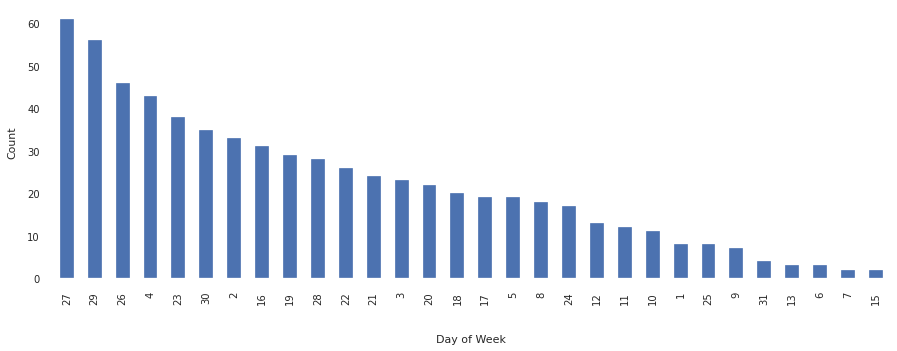

In [ ]:
plt.figure(figsize=(15,5))
df_train['current_day'].value_counts().plot(kind='bar')
plt.xlabel("Day of Week", labelpad = 30)
plt.ylabel("Count", labelpad = 10)

**Observations :**

We observe very less bookings on weekends. **May be these routes are used by working people.**. Lets confirm same using **is_weekend** column.

### 5.1.3 Passenger travel count (weekday VS weekend)


In [ ]:
df_train['is_weekend'].value_counts()

False    568
True     93 
Name: is_weekend, dtype: int64

Text(0, 0.5, 'Count')

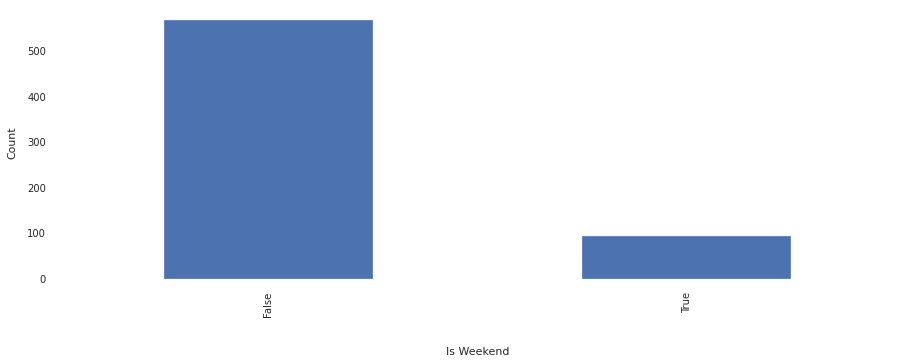

In [ ]:
plt.figure(figsize=(15,5))
df_train['is_weekend'].value_counts().plot(kind='bar')
plt.xlabel("Is Weekend", labelpad = 30)
plt.ylabel("Count", labelpad = 10)

**Observations**

Current observation confirms previous observation.

### 5.1.4 Halt time (source)


In [ ]:
# binning mean_halt_times_source
df_train['mean_halt_times_source_bin'] = pd.cut(df_train['mean_halt_times_source'], [-1, 100, 200,300,400,500,600,700])

df_train["mean_halt_times_source_bin"] = pd.Categorical(df_train["mean_halt_times_source_bin"])
df_train["mean_halt_times_source_bin"] = df_train["mean_halt_times_source_bin"].cat.codes

df_train.head()

,mean_halt_times_source,mean_halt_times_destination,current_day,current_month,current_week,destination_name,hour_of_day,is_weekend,source_name,train_name,target,dist_bw_routes,mean_halt_times_source_bin
id_code,,,,,,,,,,,,,
isfywypmkqqhyft,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6
mqsfxyvuqpbwomk,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6
alspwwtbdvqsgby,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6
szitxhhqduyrqpg,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6
krisdqzczivvwcp,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6


In [ ]:
df_train['mean_halt_times_source_bin'].value_counts()

0    279
1    184
3    103
6    63 
2    27 
4    5  
Name: mean_halt_times_source_bin, dtype: int64

([<matplotlib.axis.XTick at 0x7f38fad75518>,
 [Text(0, 0, '0-100'),
  Text(0, 0, '600-700'),
  Text(0, 0, '100-200'),
  Text(0, 0, '300-400'),
  Text(0, 0, '400-500'),
  Text(0, 0, '200-300'),
  Text(0, 0, '500-600')])

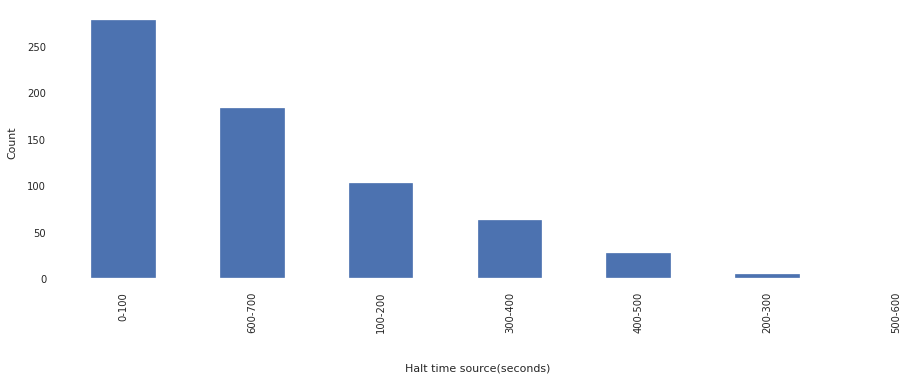

In [ ]:
plt.figure(figsize=(15,5))
df_train['mean_halt_times_source_bin'].value_counts().plot(kind='bar')
plt.xlabel("Halt time source(seconds)", labelpad = 30)
plt.ylabel("Count", labelpad = 10)
plt.xticks(np.arange(7), labels=('0-100', '600-700', '100-200', '300-400', '400-500', '200-300', '500-600'))

### 5.1.5 Halt time (destination)

In [ ]:
# binning mean_halt_times_destination
df_train['mean_halt_times_destination_bin'] = pd.cut(df_train['mean_halt_times_destination'], [-1, 100, 200,300,400,500,600,700])

df_train["mean_halt_times_destination_bin"] = pd.Categorical(df_train["mean_halt_times_destination_bin"])
df_train["mean_halt_times_destination_bin"] = df_train["mean_halt_times_destination_bin"].cat.codes

df_train.head()

,mean_halt_times_source,mean_halt_times_destination,current_day,current_month,current_week,destination_name,hour_of_day,is_weekend,source_name,train_name,target,dist_bw_routes,mean_halt_times_source_bin,mean_halt_times_destination_bin
id_code,,,,,,,,,,,,,,
isfywypmkqqhyft,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6,3
mqsfxyvuqpbwomk,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6,3
alspwwtbdvqsgby,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6,3
szitxhhqduyrqpg,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6,3
krisdqzczivvwcp,634.16474,358.178035,27,7,30,station$1,20,False,station$147,ICZVZS,high,26.299799,6,3


([<matplotlib.axis.XTick at 0x7f38facdf470>,
 [Text(0, 0, '0-100'),
  Text(0, 0, '600-700'),
  Text(0, 0, '100-200'),
  Text(0, 0, '300-400'),
  Text(0, 0, '400-500'),
  Text(0, 0, '200-300'),
  Text(0, 0, '500-600')])

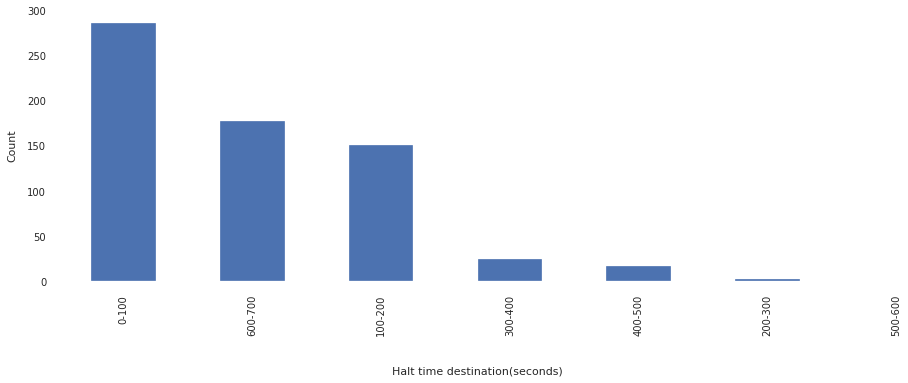

In [ ]:
plt.figure(figsize=(15,5))
df_train['mean_halt_times_destination_bin'].value_counts().plot(kind='bar')
plt.xlabel("Halt time destination(seconds)", labelpad = 30)
plt.ylabel("Count", labelpad = 10)
plt.xticks(np.arange(7), labels=('0-100', '600-700', '100-200', '300-400', '400-500', '200-300', '500-600'))

**Observations :**

Mean halt times(source and destination) is either between 0-100 and 600-700(which are two ertreme values)

### 5.1.6 How is our target variable distributed?

In [ ]:
df_train['target'].value_counts()

low       295
medium    184
high      182
Name: target, dtype: int64

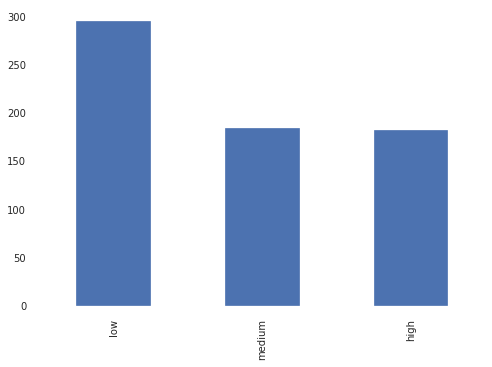

In [ ]:
df_train['target'].value_counts().plot(kind='bar')

**Observations:**

We observe target varibale is nearly uniformly distributed.

 <a id=section502></a>
## 5.2  Multivariate Analysis

### 5.2.1 Halt time (source Vs destination)

([<matplotlib.axis.XTick at 0x7f38fac24ac8>,
 [Text(0, 0, '0-100'),
  Text(0, 0, '200-300'),
  Text(0, 0, '400-500'),
  Text(0, 0, '600-700'),
  Text(0, 0, '100-200'),
  Text(0, 0, '300-400'),
  Text(0, 0, '500-600')])

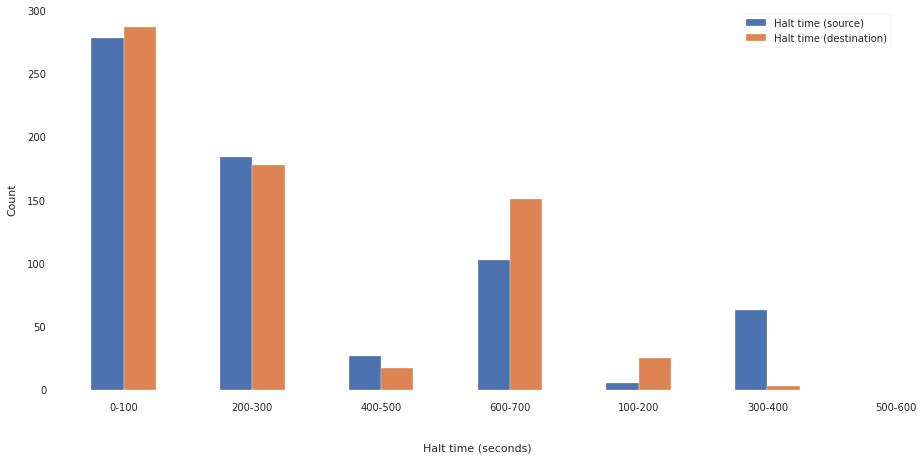

In [ ]:
df = pd.DataFrame(
	{
	'Halt time (source)': df_train['mean_halt_times_source_bin'].value_counts(sort=False),
    'Halt time (destination)': df_train['mean_halt_times_destination_bin'].value_counts(sort=False)
	}
	) 
df.plot.bar(rot=0,figsize=(15, 7))

plt.xlabel("Halt time (seconds)", labelpad = 30)
plt.ylabel("Count", labelpad = 10)
plt.xticks(np.arange(7), labels=('0-100', '200-300', '400-500', '600-700', '100-200', '300-400', '500-600'))

In [ ]:
df_train.drop('mean_halt_times_source_bin', axis = 1, inplace=True)
df_train.drop('mean_halt_times_destination_bin', axis = 1, inplace=True)

 <a id=section6></a>
# 6. Data preparation for model building

In [ ]:
df_train.columns

Index(['mean_halt_times_source', 'mean_halt_times_destination', 'current_day',
       'current_month', 'current_week', 'destination_name', 'hour_of_day',
       'is_weekend', 'source_name', 'train_name', 'target', 'dist_bw_routes'],
      dtype='object')

In [ ]:
# storing columns with continuos datatype in 'continuos_cols' 
continuous_columns = list(df_test.select_dtypes(include='number').columns)
categorical_columns = list(df_test.columns.difference(continuous_columns))

print(continuous_columns)
print(categorical_columns)

print('continuous_columns length : {} '.format(len(continuous_columns)))
print('categorical_columns length : {}'.format(len(categorical_columns)))

['mean_halt_times_source', 'mean_halt_times_destination', 'dist_bw_routes']
['current_day', 'current_month', 'current_week', 'destination_name', 'hour_of_day', 'is_weekend', 'source_name', 'train_name']
continuous_columns length : 3 
categorical_columns length : 8


 <a id=section601></a>
## 6.1 Standardising continuous columns

#### Train

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardizing of  data
scaler = StandardScaler().fit(df_train[continuous_columns])
data = scaler.transform(df_train[continuous_columns])

In [ ]:
# forming dataframe after standardization
df_train_sd= pd.DataFrame(data)
df_train_sd.columns = continuous_columns
df_train_sd.index = df_train.index
print(df_train_sd.shape)

(661, 3)


#### Test

In [ ]:
data = scaler.transform(df_test[continuous_columns])

# forming dataframe after standardization
df_test_sd= pd.DataFrame(data)
df_test_sd.columns = continuous_columns
df_test_sd.index = df_test.index
print(df_test_sd.shape)

(964, 3)


 <a id=section602></a>
## 6.2 Dummification / One-Hot Encoding of categorical variables

In [ ]:
# lets look at how many unique labels each category has
for i in range(0, len(categorical_columns)):
  print(categorical_columns[i], " - ", df_train[categorical_columns[i]].nunique())

current_day  -  30
current_month  -  4
current_week  -  11
destination_name  -  175
hour_of_day  -  22
is_weekend  -  2
source_name  -  155
train_name  -  329


**Observations:**
 
As we have lots of categories in one column,

Can we apply below thesis results?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf


**Summary:**

In the winning solution Of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection the authors limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (O) for a particular observation.

#### Train

In [ ]:
cols_to_drop = []
df_train_cat = pd.DataFrame()
df_test_cat =  pd.DataFrame()

for col in categorical_columns: 
    imp_labels = list(df_train[col].value_counts().head(10).index)
    
    for label in imp_labels:
        df_train_cat[str(col)+'_'+str(label)] = np.where(df_train[col] == label, 1, 0)
        df_test_cat[str(col)+'_'+str(label)] = np.where(df_test[col] == label, 1, 0)
    
    cols_to_drop.append(col)
    # df_train.drop(col, axis = 1, inplace=True)
df_train_cat.index = df_train.index 
df_test_cat.index = df_test.index  
df_train_cat.shape, df_test_cat.shape

((661, 66), (964, 66))

**Observations:**

We have 70* columns after one-hot encoding

#### Merging all columns together.

In [ ]:
# merge categorical and continuos columns
df_train = pd.concat([df_train_sd, df_train_cat, df_train['target']],axis=1).reindex(df_train.index)
df_train.shape

(661, 70)

In [ ]:
# merge categorical and continuos columns
df_test = pd.concat([df_test_sd, df_test_cat] ,axis=1).reindex(df_test.index)
df_test.shape

(964, 69)

In [ ]:
df_test.isna().sum()

mean_halt_times_source         0
mean_halt_times_destination    0
dist_bw_routes                 0
current_day_27                 0
current_day_29                 0
                              ..
train_name_LVVT                0
train_name_ICXWXY              0
train_name_ICWYAR              0
train_name_ICWXZT              0
train_name_ICTXU               0
Length: 69, dtype: int64

 <a id=section7></a>
# 7. Creating model and prediction

### Splitting data into training and testing data.


In [ ]:
feature_cols = list(df_train.columns)
feature_cols.remove('target')
y = df_train['target']
X = df_train[feature_cols]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test datasets
test_data_split = 0.2
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size = test_data_split,random_state=99, stratify=y)

 <a id=section701></a>
## 7.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)

logistic_train_preds = logistic.predict(X_train)
logistic_test_preds = logistic.predict(X_test)

print(confusion_matrix(y_train, logistic_train_preds))
print(confusion_matrix(y_test, logistic_test_preds))

print(classification_report(y_train, logistic_train_preds))
print(classification_report(y_test, logistic_test_preds))

[[ 95  19  31]
 [ 36 162  38]
 [ 37  31  79]]
[[18 10  9]
 [10 38 11]
 [12 12 13]]
              precision    recall  f1-score   support

        high       0.57      0.66      0.61       145
         low       0.76      0.69      0.72       236
      medium       0.53      0.54      0.54       147

    accuracy                           0.64       528
   macro avg       0.62      0.63      0.62       528
weighted avg       0.65      0.64      0.64       528

              precision    recall  f1-score   support

        high       0.45      0.49      0.47        37
         low       0.63      0.64      0.64        59
      medium       0.39      0.35      0.37        37

    accuracy                           0.52       133
   macro avg       0.49      0.49      0.49       133
weighted avg       0.52      0.52      0.52       133



 <a id=section702></a>
## 7.2 KNN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,accuracy_score,f1_score
%matplotlib inline

train_performance={}
test_performance={}

for k in range(1,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_temp.fit(X_train,y_train)
    k_train_preds=knn_temp.predict(X_train)
    k_test_preds=knn_temp.predict(X_test)
    train_performance[k]=f1_score(y_train,k_train_preds, average='weighted')
    test_performance[k]=f1_score(y_test,k_test_preds, average='weighted')

In [ ]:
keys = test_performance.keys()
train_values = train_performance.values()
test_values = test_performance.values()

In [ ]:
perf=pd.DataFrame()
perf['k']= keys
perf['train_performance']= train_values
perf['test_performance']= test_values

In [ ]:
perf.sort_values(by='test_performance', ascending=False, axis=0).head()

,k,train_performance,test_performance
4,9,0.967703,0.558069
2,5,0.967703,0.557595
6,13,0.967703,0.543798
5,11,0.967703,0.541426
24,49,0.967703,0.534226


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train,y_train)

knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print(confusion_matrix(y_train, knn_train_preds))
print(confusion_matrix(y_test, knn_test_preds))

print(classification_report(y_train, knn_train_preds))
print(classification_report(y_test, knn_test_preds))

[[145   0   0]
 [  4 232   0]
 [  8   5 134]]
[[18 17  2]
 [ 6 45  8]
 [11 13 13]]
              precision    recall  f1-score   support

        high       0.92      1.00      0.96       145
         low       0.98      0.98      0.98       236
      medium       1.00      0.91      0.95       147

    accuracy                           0.97       528
   macro avg       0.97      0.96      0.96       528
weighted avg       0.97      0.97      0.97       528

              precision    recall  f1-score   support

        high       0.51      0.49      0.50        37
         low       0.60      0.76      0.67        59
      medium       0.57      0.35      0.43        37

    accuracy                           0.57       133
   macro avg       0.56      0.53      0.53       133
weighted avg       0.57      0.57      0.56       133



 <a id=section703></a>
### 7.3 Naive Bayes 

In [ ]:
# Naive Bayes classification
gnb = GaussianNB(priors=None)

# Train classifier
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb_train_preds = gnb.predict(X_train)
gnb_test_preds = gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, gnb_train_preds))
print(confusion_matrix(y_test, gnb_test_preds))

print(classification_report(y_train, gnb_train_preds))
print(classification_report(y_test, gnb_test_preds))

[[140   4   1]
 [130 101   5]
 [109  17  21]]
[[33  1  3]
 [29 29  1]
 [25  6  6]]
              precision    recall  f1-score   support

        high       0.37      0.97      0.53       145
         low       0.83      0.43      0.56       236
      medium       0.78      0.14      0.24       147

    accuracy                           0.50       528
   macro avg       0.66      0.51      0.45       528
weighted avg       0.69      0.50      0.47       528

              precision    recall  f1-score   support

        high       0.38      0.89      0.53        37
         low       0.81      0.49      0.61        59
      medium       0.60      0.16      0.26        37

    accuracy                           0.51       133
   macro avg       0.59      0.52      0.47       133
weighted avg       0.63      0.51      0.49       133



 <a id=section704></a>
### 7.4 SVM

In [ ]:
# SVM
from sklearn import svm
model_svm = svm.SVC(probability=True, kernel='rbf', degree = 3)
model_svm.fit(X_train, y_train)

model_svm_train_preds = model_svm.predict(X_train)
model_svm_test_preds = model_svm.predict(X_test)

print(confusion_matrix(y_train, model_svm_train_preds))
print(confusion_matrix(y_test, model_svm_test_preds))

print(classification_report(y_train, model_svm_train_preds))
print(classification_report(y_test, model_svm_test_preds))

[[ 98  33  14]
 [ 14 215   7]
 [ 20  64  63]]
[[12 20  5]
 [ 9 47  3]
 [ 8 21  8]]
              precision    recall  f1-score   support

        high       0.74      0.68      0.71       145
         low       0.69      0.91      0.78       236
      medium       0.75      0.43      0.55       147

    accuracy                           0.71       528
   macro avg       0.73      0.67      0.68       528
weighted avg       0.72      0.71      0.70       528

              precision    recall  f1-score   support

        high       0.41      0.32      0.36        37
         low       0.53      0.80      0.64        59
      medium       0.50      0.22      0.30        37

    accuracy                           0.50       133
   macro avg       0.48      0.45      0.43       133
weighted avg       0.49      0.50      0.47       133



**NOTE:**

After applying multiple ML algorithm we observe best results using **SVM**.
Let's now train whole data using SVM and predict our test data.

# 8. Conclusion

## Using Naive-Bayes for final prediction

In [ ]:
# Predict SVM
y_pred = gnb.predict(df_test)

In [ ]:
# expoting results to csv file
train_passenger_volume_prediction = pd.DataFrame({'id_code': df_test.index, 'target':y_pred});
train_passenger_volume_prediction.set_index('id_code',  inplace = True)
train_passenger_volume_prediction.to_csv('train_passenger_volume_prediction.csv',index = 'id_code')